<img src="https://unal.edu.co/_assets/ca8e1ca9a551c3e3ffc233b30e54ba93/images/escudoUnal.svg" width="800" height="500">

# LABORATORIO 1

## Gustavo Arteaga 
## Universidad Nacional de Colombia - Facultad de minas 
## Tópicos Azanzados de Procesamiento Digital de Señales
### 2024-03-14


# 1. Manipulación y representación de Señales en Matlab


#### Actividades:

#### Código suministrado:
<img src="../img/matlabcode.png" width="800" height="500">

### 📝 1.1  Los resultados obtenidos luego de ejecutar el programa deben tener una forma similar a la mostrada en la Figura 2. Analice dichos resultados e interprételos a la luz de la teoría. ¿Qué relación existe entre las componentes espectrales y la señal original en el dominio del tiempo? ¿A qué frecuencias aparecen dichos componentes? ¿Hay algún tipo de discrepancia con los resultados esperados?

<img src="../img/figura2.png" width="800" height="500">


## ✅ Resultado:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift

# Parameters
Fs = 8000  # Sampling Frequency
T = 1/Fs  # Sampling Interval
t = np.arange(0, 0.05, T)  # Time Vector
x = 3 + 2 * np.cos(120 * np.pi * t)  # Sinusoidal Signal
# Plot Signal in Time Domain
plt.figure(figsize=(17, 4))
plt.subplot(2, 1, 1)  # Prepare subplot
plt.plot(t, x, linewidth=2)
plt.title('Signal in Time Domain')
plt.xlabel('Time [s]')
plt.xticks(np.arange(0, 0.05, 0.005))
plt.ylabel('Amplitude')

# Fast Fourier Transform (Magnitude)
X = np.abs(fftshift(fft(x))) / len(x)

# Frequency Variable
N = len(x)
f = (np.arange(-N/2, N/2) * Fs) / N

# Plot Signal in Frequency Domain
# cambiar tamaño 
plt.figure(figsize=(13, 4))
plt.subplot(2, 1, 2)  # Prepare subplot
plt.plot(f, X, linewidth=2)
plt.title('Signal in Frequency Domain')
plt.xlabel('Frequency [Hz]')
plt.xticks(np.arange(-4000, 4000, 100))
# rotar los valores del eje x
plt.xticks(rotation=90)
plt.ylabel('Magnitude')

plt.tight_layout()  # Adjust the layout of the plots
plt.show()  # Display the plots


Las componentes espectrales de una señal son una representación de la misma en el dominio de la frecuencia, lo que permite analizar las componentes de frecuencia que componen la señal original y la amplitud de estas frecuencias.

En el problems planteado, la señal en el dominio del tiempo es una suma de un término constante y un coseno, específicamente:

$$x(t) = 3 + 2 \cos(120\pi t)$$


Analizando la ecuación se determina que la señal es una combinación de una componente de corriente continua (DC) debido a la constante "3" y una componente sinusoidal con una amplitud de "2" y una frecuencia de oscilación de $$120\pi$$ radianes por segundo. Al convertir esta frecuencia a hertz, consideramos que $$f = \frac{\omega}{2\pi}$$, lo que nos da una frecuencia de **60 Hz** para la componente sinusoidal. 

La transformada de Fourier, al aplicarse a la señal, descompone la misma en estas componentes espectrales, permitiéndonos ver con claridad las frecuencias que componen la señal y su respectiva amplitud. Luego de analizar el espectro de frecuencias de esta señal, se determina lo siguiente:

1. **Componente de DC**: Se encuentra un pico de frecuencia en **0 Hz** correspondiente al término constante de la señal. Esto se debe a que una señal constante en el tiempo se interpreta como una señal de frecuencia cero en el dominio de la frecuencia.

2. **Componentes sinusoidales**: se visualiza dos picos de freciencia en **±60 Hz** correspondientes a la componente sinusoidal de la señal. Estos picos representan la frecuencia fundamental de la señal sinusoidal y su inversa, dado que la transformada de Fourier considera componentes de frecuencia tanto positivas como negativas.



# ***************************************************************************************************

### 📝 1.2 Tome grabaciones de audio por medio del micrófono del computador y haga representaciones en el dominio del tiempo y de la frecuencia de las señales capturadas. Efectúe manipulaciones simples sobre dichas señales (cambio de amplitud o volumen, inversión en el dominio del tiempo, combinación o mezclado entre varias señales, etc.) y tome nota del efecto de dichas manipulaciones en las representaciones de la señal en el dominio del tiempo y de la frecuencia.

## ✅ Resultado:

In [1]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import sounddevice as sd
print(sd.query_devices())

  0 SRS-XB12, Core Audio (1 in, 0 out)
  1 SRS-XB12, Core Audio (0 in, 2 out)
  2 LG ULTRAGEAR, Core Audio (0 in, 2 out)
  3 iPhone de Gustavo Microphone, Core Audio (1 in, 0 out)
  4 DDJ-FLX4, Core Audio (2 in, 4 out)
> 5 MacBook Air Microphone, Core Audio (1 in, 0 out)
< 6 MacBook Air Speakers, Core Audio (0 in, 2 out)
  7 Microsoft Teams Audio, Core Audio (2 in, 2 out)
  8 rekordbox Aggregate Device, Core Audio (2 in, 4 out)


### Grabar Audio

In [9]:
# Configuración para la grabación
fs = 44100  # Frecuencia de muestreo
duration = 3  # Duración en segundos
filename = 'output.wav'  # Nombre del archivo para guardar la grabación
print("Comenzando la grabación.")
recorded_data = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float64')
sd.wait()  # Esperar hasta que la grabación termine
print("Grabación finalizada.")
# Guardar la grabación en un archivo WAV
write(filename, fs, recorded_data)

Comenzando la grabación.
Grabación finalizada.


### muestreo de la onda de audio

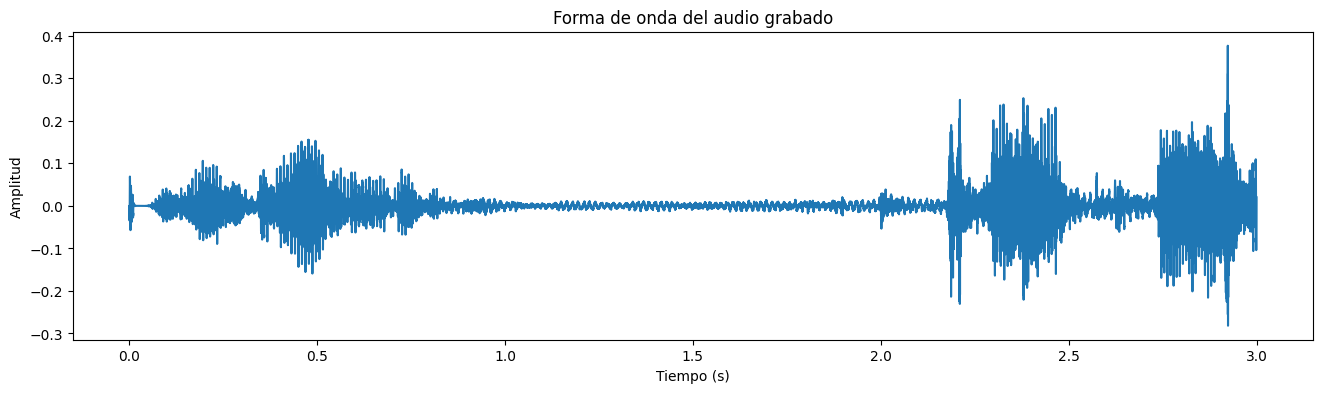

In [10]:
# Analizar la forma de onda
plt.figure(figsize=(16, 4))
plt.plot(np.linspace(0, duration, len(recorded_data)), recorded_data[:, 0])  # Graficar solo un canal
plt.title("Forma de onda del audio grabado")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()



### Reproducir audio grabado

In [12]:
# Reproducir el audio grabado
print("Reproduciendo el audio grabado.")
sd.play(recorded_data, fs)
sd.wait()  # Esperar hasta que la reproducción termine

Reproduciendo el audio grabado.


### Análisis en la frecuencia

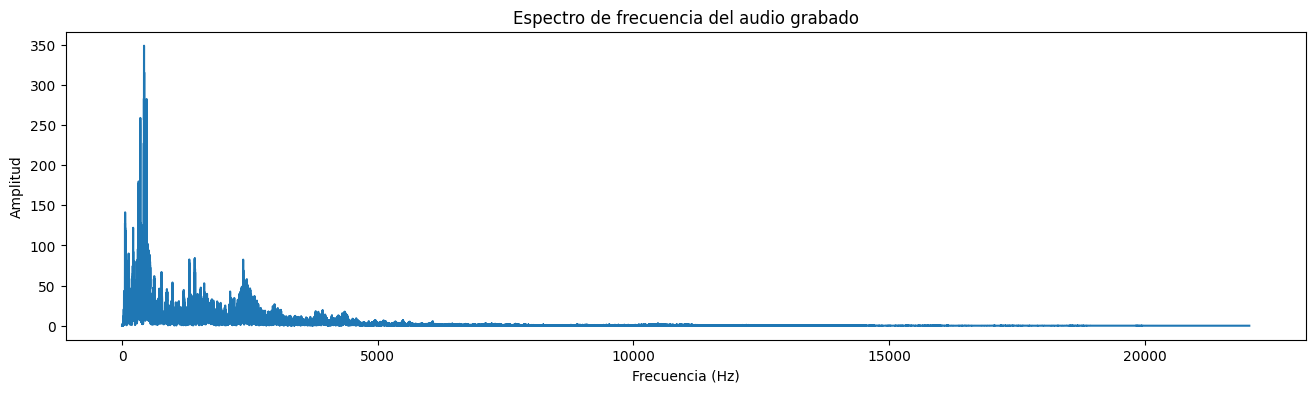

In [13]:
# Analisis en la frecuencia
n = len(recorded_data)
f = np.fft.fftfreq(n, 1/fs)
f = f[:n//2]
transformada = np.fft.fft(recorded_data[:, 0])
transformada = transformada[:n//2]
plt.figure(figsize=(16, 4))
plt.plot(f, np.abs(transformada))
plt.title("Espectro de frecuencia del audio grabado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.show()

## Cambio de Amplitud o Volumen

In [15]:
import numpy as np

# recorded_data contiene la grabación original
factor_amplitud = 2.0  # Para duplicar el volumen
recorded_data_amplificado = recorded_data * factor_amplitud

# Reproducir el audio grabado
print("Reproduciendo el audio grabado.")
sd.play(recorded_data_amplificado, fs)
sd.wait()  # Esperar hasta que la reproducción termine


Reproduciendo el audio grabado.


### muestreo de la onda de audio con cambio de amplitud o volumen 

<Figure size 1600x400 with 0 Axes>

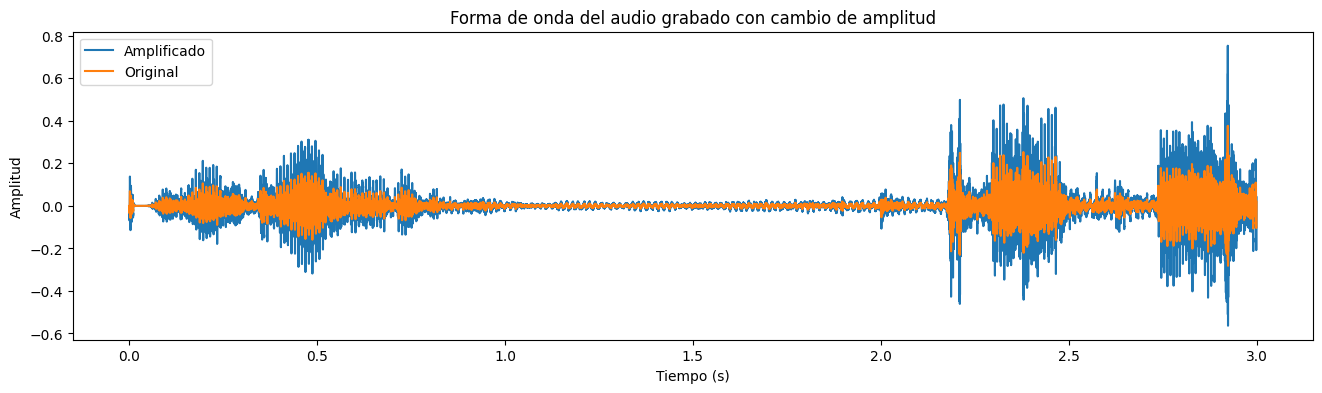

In [18]:
# Analizar la forma de onda
plt.figure(figsize=(16, 4))
plt.figure(figsize=(16, 4))
# Dibuja la forma de onda del audio amplificado
plt.plot(np.linspace(0, duration, len(recorded_data_amplificado)), recorded_data_amplificado[:, 0], label='Amplificado')
# Dibuja la forma de onda del audio original
plt.plot(np.linspace(0, duration, len(recorded_data)), recorded_data[:, 0], label='Original')
# Título y etiquetas de los ejes
plt.title("Forma de onda del audio grabado con cambio de amplitud")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
# Muestra la leyenda
plt.legend()
plt.show()

### Inversión en el Dominio del Tiempo


In [25]:
recorded_data_invertido = np.flipud(recorded_data)

# Reproducir el audio grabado
print("Reproduciendo el audio grabado.")
sd.play(recorded_data_invertido, fs)
sd.wait()  # Esperar hasta que la reproducción termine


Reproduciendo el audio grabado.


### muestreo de la onda de audio con inversión en el dominio del tiempo

<Figure size 1600x400 with 0 Axes>

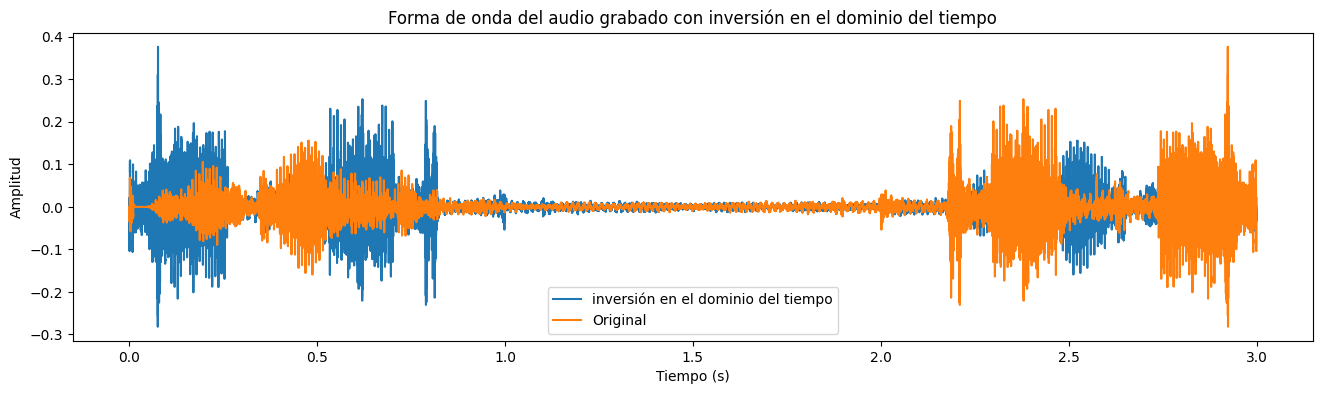

In [20]:
# Analizar la forma de onda
plt.figure(figsize=(16, 4))
plt.figure(figsize=(16, 4))
# Dibuja la forma de onda del audio amplificado
plt.plot(np.linspace(0, duration, len(recorded_data_invertido)), recorded_data_invertido[:, 0], label='inversión en el dominio del tiempo')
# Dibuja la forma de onda del audio original
plt.plot(np.linspace(0, duration, len(recorded_data)), recorded_data[:, 0], label='Original')
# Título y etiquetas de los ejes
plt.title("Forma de onda del audio grabado con inversión en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
# Muestra la leyenda
plt.legend()
plt.show()

## Combinación o Mezclado de Varias Señales

### Reproducir audio con el que se combinara 

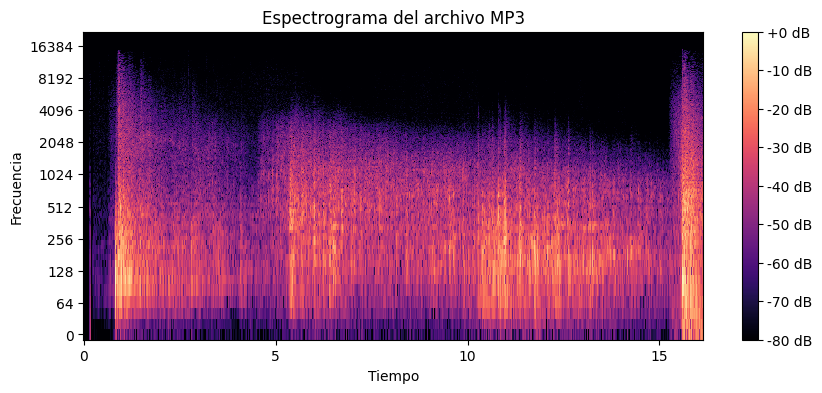

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Ruta al archivo MP3
archivo_mp3 = 'truenos.mp3'

# Cargar el audio con librosa
data, fs_actual = librosa.load(archivo_mp3, sr=44100)  # `sr=44100` resamplea a 44100 Hz si es necesario

# Calcular la STFT del audio
D = np.abs(librosa.stft(data))

# Visualizar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', sr=fs_actual)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma del archivo MP3')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
mezcla = recorded_data + otra_grabacion

# Para evitar posibles distorsiones por sobrecarga, puedes normalizar la mezcla
mezcla_normalizada = mezcla / np.max(np.abs(mezcla))